In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Первое знакомство с нейронной сетью

In [77]:
import tensorflow
import keras

In [27]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
pd.DataFrame(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [69]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [70]:
# Или так:
# from tensorflow import keras
# from tensorflow.keras import layers
# model = keras.Sequential([
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [71]:
network.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
- функцию потерь, которая определяет, как сеть должна оценивать качество
своей работы на обучающих данных и, соответственно, как корректировать ее
в правильном направлении;
- оптимизатор — механизм, с помощью которого сеть будет обновлять себя,
опираясь на наблюдаемые данные и функцию потерь;
- метрики для мониторинга на этапах обучения и тестирования — здесь нас
будет интересовать только точность (доля правильно классифицированных
изображений).

Перед обучением мы выполним предварительную обработку данных, преобразовав
их в форму, которую ожидает получить нейронная сеть, и масштабируем их так,
чтобы все значения оказались в интервале [0, 1]. Исходные данные — обучающие изображения — хранятся в трехмерном массиве (60000, 28, 28) типа uint8,
значениями в котором являются числа в интервале [0, 255]. Мы преобразуем его
в массив (60000, 28 * 28) типа float32 со значениями в интервале [0, 1].

In [72]:
# Подготовка исходных данных
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [73]:
# Подготовка меток
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [74]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2568 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1048 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0698 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9884


Проверим на test:

In [75]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9788
test_acc: 0.9787999987602234


На train показатели лучше чем на test. Эта разница между точностью на тренировочном и контрольном
наборах демонстрирует пример переобучения (overfitting), когда модели машинного
обучения показывают худшую точность на новом наборе данных по сравнению
с тренировочным.

# Представление данных для нейронных сетей

Тензоры — многомерные массивы Numpy\
Тензоры — это обобщение матриц
с произвольным количеством измерений

В теорминологии тензоров число измерений (ранг) часто называют осями.

## Скаляры (тензоры нулевого ранга)

In [14]:
x = np.array(12)
x

array(12)

In [15]:
# ndim показывает, сколько осей у тензора
x.ndim

0

## Векторы (тензоры первого ранга)

In [16]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [17]:
x.ndim

1

Этот вектор содержит пять элементов и поэтому называется пятимерным вектором.
Не путайте пятимерные векторы с пятимерными тензорами! Пятимерный вектор
имеет только одну ось и пять значений на этой оси, тогда как пятимерный тензор
имеет пять осей (и может иметь любое количество значений на каждой из них).

## Матрицы (тензоры второго ранга)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])

In [22]:
x.ndim

2

## Тензоры третьего и высшего рангов

In [23]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

In [24]:
x.ndim

3

## Ключевые атрибуты тензора

- Количество осей
- Форма
- Тип данных

In [33]:
# Вернемся к данным MNIST:
train_images.ndim

3

In [35]:
train_images.dtype

dtype('uint8')

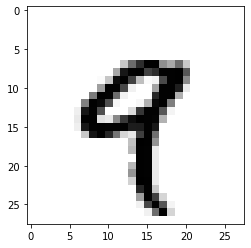

In [44]:
# cmap=plt.cm.binary - делает картинку ч.б.
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Манипулирование тензорами с помощью Numpy

Операция выбора конкретного элемента в тензоре называется получением среза тензора.

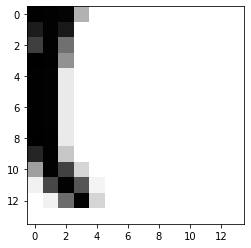

In [74]:
# квадрат 14х14 в правом нижнем углу
my_slice = train_images[:, 14:, 14:]

plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

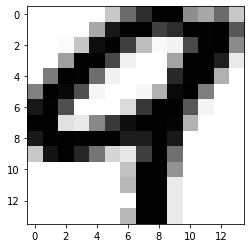

In [75]:
# квадрат 14х14 в центре
my_slice = train_images[:, 7:-7, 7:-7]

plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

Модели глубокого обучения не обрабатывают весь набор данных целиком; они разбивают его на небольшие пакеты (batch). При рассмотрении таких пакетных тензоров первую ось (ось с индексом 0) называют осью пакетов, или измерением пакетов.

## Практические примеры тензоров с данными

- векторные данные — двумерные тензоры с формой (образцы, признаки);
- временные ряды или последовательности — трехмерные тензоры с формой (образцы, метки_времени, признаки);
- изображения — четырехмерные тензоры с формой (образцы, высота, ширина,
цвет) или с формой (образцы, цвет, высота, ширина);
- видео — пятимерные тензоры с формой (образцы, кадры, высота, ширина, цвет)
или с формой (образцы, кадры, цвет, высота, ширина).

# Операции с тензорами

В нашем первом примере мы создали сеть, наложив друг на друга два слоя Dense.
В библиотеке Keras экземпляр слоя выглядит так:

In [78]:
keras.layers.Dense(512, activation='relu')

Этот слой можно интерпретировать как функцию, которая принимает двумерный
тензор и возвращает другой двумерный тензор — новое представление исходного
тензора. В данном случае функция имеет следующий вид (где W — это двумерный
тензор, а b — вектор, оба значения являются атрибутами слоя):

output = relu(dot(W, input) + b)

Давайте развернем ее. Здесь у нас имеется три операции с тензорами: скалярное
произведение (dot) исходного тензора input и тензора с именем W; сложение (+)
получившегося двумерного тензора и вектора b; и, наконец, операция relu. relu(x)
эквивалентна операции max(x, 0), т.е. в данном случае если число отрицательное, то relu заменяет его на 0.

## Поэлементные операции

Операция relu и сложение — это поэлементные операции: операции, которые применяются к каждому элементу в тензоре по отдельности. То есть эти операции
поддаются массовому распараллеливанию (векторизации).

In [148]:
x = np.array([[15, -5, 1], [5, 2, 2]])
y = np.array([[1, 1, 1], [2, 2, 2]])

In [163]:
# реализуем операцию relu:
def naive_relu(x):
    assert len(x.shape) == 2 # Убедиться, что x — двумерный тензор Numpy
    
    x = x.copy()
    for i in range (x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [164]:
# реализуем операцию сложения:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

## Расширение тензора

Что происходит при сложении, когда
формы складываемых тензоров различаются?
Когда это возможно и не вызывает неоднозначности, меньший тензор расширяется
так, чтобы его новая форма соответствовала форме большего тензора. Расширение
выполняется в два этапа:
1. В меньший тензор добавляются оси (называются осями расширения), чтобы
значение его атрибута ndim соответствовало значению этого же атрибута большего тензора.
2. Меньший тензор копируется в эти новые оси до полного совпадения с формой
большего тензора.

In [168]:
# расширение вектора до матрицы:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2. # Убедиться, что x — двумерный тензор Numpy.
    assert len(y.shape) == 1. # Убедиться, что y — вектор Numpy.
    assert x.shape[1] == y.shape[0]
    x = x.copy() # Исключить затирание исходного тензора
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [188]:
x = np.array([[15, -5, 1], [5, 2, 2]])
y = np.array([1, 5, 1])

In [189]:
naive_add_matrix_and_vector(x, y)

array([[16,  0,  2],
       [ 6,  7,  3]])

Прием расширения в общем случае можно применять в поэлементных операциях
с двумя тензорами, если один тензор имеет форму (a, b, ... n, n + 1, ... m), а другой — форму (n, n + 1, ... m). В этом случае при расширении будут добавлены оси
до n - 1.

In [190]:
x = np.random.random((64, 3, 32, 10)) # x — тензор случайных чисел, имеющий форму (64, 3, 32, 10)
y = np.random.random((32, 10)) # y — тензор случайных чисел, имеющий форму (32, 10)
z = np.maximum(x, y) # Получившийся тензор z имеет форму (64, 3, 32, 10) аналогично x  в примере выше

## Скалярное произведение тензоров

Скалярное произведение, также иногда называемое тензорным произведением (не
путайте с поэлементным произведением), — наиболее общая и наиболее полезная операция с тензорами. В отличие от поэлементных операций, она объединяет элементы из исходных тензоров.

- Поэлементное произведение в Numpy, Keras, Theano и TensorFlow выполняется
с помощью оператора *. 
- Операция скалярного произведения в TensorFlow имеет
иной синтаксис, но в Numpy и Keras используется простой оператор dot.

In [193]:
x = np.array([[15, -5, 1], [5, 2, 2]])
y = np.array([1, 5, 1])

In [194]:
z = np.dot(x, y)

In [195]:
z

array([-9, 17])

In [197]:
# скалярное произведение двух векторов:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1 # Убедиться, что x и y — векторы Numpy
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

Также есть возможность получить скалярное произведение матрицы x на вектор y,
являющееся вектором, элементы которого — скалярные произведения строк x на y:

In [200]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0]) # Эта операция вернет вектор с нулевыми элементами, имеющий ту же форму, что и y
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z # на выходе получим вектор, состоящий из скалярных произведений

In [199]:
naive_matrix_vector_dot(x, y)

array([-9., 17.])

Обратите внимание, что, если один из двух тензоров имеет ndim больше 1, скалярное произведение перестает быть симметричной операцией, то есть результат
dot(x, y) не совпадает с результатом dot(y, x).

Наиболее часто на практике применяется скалярное
произведение двух матриц. Получить скалярное произведение двух матриц, x и y
(dot(x, y)), можно, только если x.shape[1] == y.shape[0]. В результате получится матрица с формой (x.shape[0], y.shape[1]), элементами которой являются
скалярные произведения строк x на столбцы y. Вот как могла бы выглядеть простейшая реализация:

In [205]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2 # Убедиться, что x и y — матрицы Numpy
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]): # Обход строк в x...
        for j in range(y.shape[1]): # и столбцов в y
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y) # скалярно умножаем i строку на j столбец
    return z # на выходе получим матрицу, состоящую из скалярных произведений

## Изменение формы тензора

In [206]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])

In [207]:
x.reshape((6, 1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

Особый случай изменения формы, который часто встречается в практике, — это
транспонирование. Транспонирование — это такое преобразование матрицы, когда
строки становятся столбцами, а столбцы — строками, то есть x[i, :] превращается
в x[:, i]:

In [211]:
x = np.zeros((300, 20))
print(x.shape)
x = np.transpose(x)
print(x.shape)

(300, 20)
(20, 300)


## Механизм нейронных сетей: оптимизация на основе градиента

output = relu(dot(W, input) + b)

В этом выражении W и b — тензоры, являющиеся атрибутами слоя. Они называются
весами, или обучаемыми параметрами слоя (атрибуты kernel и bias соответственно). Эти веса содержат информацию, извлеченную сетью из обучающих данных.

Первоначально эти весовые матрицы заполняются небольшими случайными
значениями (этот шаг называется случайной инициализацией). Начальные представления не несут никакого смысла, но они служат начальной точкой. 

Далее, на основе сигнала
обратной связи, происходит постепенная корректировка весов.

Ниже перечислены шаги, выполняемые в так называемом цикле обучения, который
повторяется столько раз, сколько потребуется:
1. Извлекается пакет обучающих экземпляров x и соответствующих целей y.
2. Сеть обрабатывает пакет x (этот шаг называется прямым проходом) и получает
пакет предсказаний y_pred.
3. Вычисляются потери сети на пакете, дающие оценку несовпадения между y_pred
и y.
4. Корректируются веса сети так, чтобы немного уменьшить потери на этом пакете.

Наиболее
сложным выглядит шаг 4: корректировка весов сети. Как по отдельным весам в сети узнать, должен некоторый коэффициент увеличиваться или уменьшаться
и насколько?

Одно из простейших решений — заморозить все веса, кроме одного, и попробовать
применить разные значения этого веса. Эту операцию можно
было бы повторить для всех весов в сети. Но такой подход крайне неэффективен, потому что требует выполнения двух
прямых проходов (что является довольно затратным) для каждого отдельного веса
(которых очень много, обычно около тысячи, а иногда и до нескольких миллионов).

Гораздо эффективнее опереться на тот факт, что все операции в сети дифференцируемы, и вычислять градиент потерь относительно каждого весового коэффициента
в сети. После этого можно было бы просто сдвигать коэффициенты в сторону,
противоположную градиенту, и тем самым уменьшать потери.

## Стохастический градиентный спуск

Стохастический градиентный
спуск на небольших пакетах (mini-batch stochastic gradient descent, minibatch SGD).
Термин «стохастический» отражает тот факт, что каждый пакет данных выбирается
случайно (в науке слово «стохастический» считается синонимом слова «случайный»):

1. Извлекается пакет обучающих экземпляров x и соответствующих целей y.
2. Сеть обрабатывает пакет x и получает пакет предсказаний y_pred.
3. Вычисляются потери сети на пакете, дающие оценку несовпадения между y_pred
и y.
4. Вычисляется градиент потерь для параметров сети (обратный проход)
5. Параметры корректируются на небольшую величину в направлении, противоположном градиенту, например W -= step * gradient, и тем самым снижаются
потери.

- Вариант алгоритма mini-batch SGD в каждой итерации использует единственный образец и цель, а не весь
пакет данных. Фактически это истинный SGD (а не mini-batch SGD). 
- Однако можно пойти другим путем и использовать на каждом шаге все доступные данные. Эта
версия алгоритма называется пакетным стохастическим градиентным спуском
(batch SGD). Каждое изменение в этом случае будет более точным, но более затратным. 

Эффективным компромиссом между этими двумя крайностями является
использование небольших пакетов.

Существует также множество вариантов стохастического градиентного спуска,
которые отличаются тем, что при вычислении следующих приращений весов
принимают в учет не только текущие значения градиентов, но и предыдущие
приращения. Примерами могут служить такие алгоритмы, как SGD с импульсом,
Adagrad, RMSProp и некоторые другие. Эти варианты известны как методы оптимизации, или оптимизаторы. В частности, внимания заслуживает идея импульса,
которая используется во многих этих вариантах. Импульс вводится для решения
двух проблем SGD: невысокой скорости сходимости и попадания в локальный
минимум.

На практике это означает, что приращение параметра w определяется не только по текущему
значению градиента, но также по величине предыдущего приращения параметра,
как показано в следующей упрощенной реализации:

In [2]:
# past_velocity = 0.
# momentum = 0.1 # Постоянное значение импульса
# while loss > 0.01: # Цикл оптимизации
#     w, loss, gradient = get_current_parameters()
#     velocity = past_velocity * momentum + learning_rate * gradient
#     w = w + momentum * velocity - learning_rate * gradient
#     past_velocity = velocity
#     update_parameter(w)

## Объединение производных: алгоритм обратного распространения ошибки

На практике функция
нейронной сети состоит из множества последовательных операций с тензорами,
объединенных в одну цепочку, каждая из которых имеет простую, известную производную. Например, пусть есть сеть f, состоящая из трех операций с тензорами a,
b и c и весовыми матрицами W1, W2 и W3:
f(W1, W2, W3) = a(W1, b(W2, c(W3)))
Формула сообщает нам, что такую цепочку функций можно получить с использованием следующего тождества, которое называется цепным правилом: f(g(x)) =
= f'(g(x)) * g'(x). Применение цепного правила к вычислению значений градиента нейронной сети приводит к алгоритму, который называется обратным распространением ошибки (Backpropagation), или обратным дифференцированием.

## Краткие итоги главы

- Обучение означает поиск комбинации параметров модели, минимизирующих
функцию потерь для данного набора обучающих данных и соответствующих
им целей.
- Обучение происходит путем извлечения пакетов случайных образцов данных
и их целей и вычисления градиента параметров сети с учетом потерь в пакете.
Затем параметры сети немного смещаются (величина смещения определяется
скоростью обучения) в направлении, противоположном направлению градиента.
- Весь процесс обучения становится возможным благодаря тому обстоятельству, что нейронные сети являются цепочками дифференцируемых операций
с тензорами и, следовательно, позволяют применять цепное правило для вывода функции градиента, отображающей текущие параметры и текущий пакет
данных в значение градиента.
- Функция потерь — это величина, которую требуется свести к минимуму в ходе
обучения, поэтому она должна представлять собой меру успеха для решаемой
вами задачи.
- Оптимизатор определяет точный способ использования градиента потерь для
изменения параметров: например, это может быть оптимизатор RMSProp, реализующий градиентный спуск с импульсом, и др.